In [169]:
data=read.csv('C:/Users/nguye/PC/vietnamese-sentiment-analysis/data_new.csv')
head(data)

X,model,data,preprocessing,text_embedding,lan_chay,accuracy_score,f1_score
20,svm,uit-vihsd,1,cv,1,0.8263,0.5337
21,svm,uit-vihsd,1,cv,2,0.8260,0.5592
22,svm,uit-vihsd,1,cv,3,0.8241,0.5452
23,svm,uit-vihsd,1,cv,4,0.8132,0.5500
24,svm,uit-vihsd,1,cv,5,0.8223,0.5323
120,svm,uit-vsmec,1,cv,1,0.5155,0.4827


H0:không có sự khác biệt giữa các model

H1: có sự khác biệt giữa các model

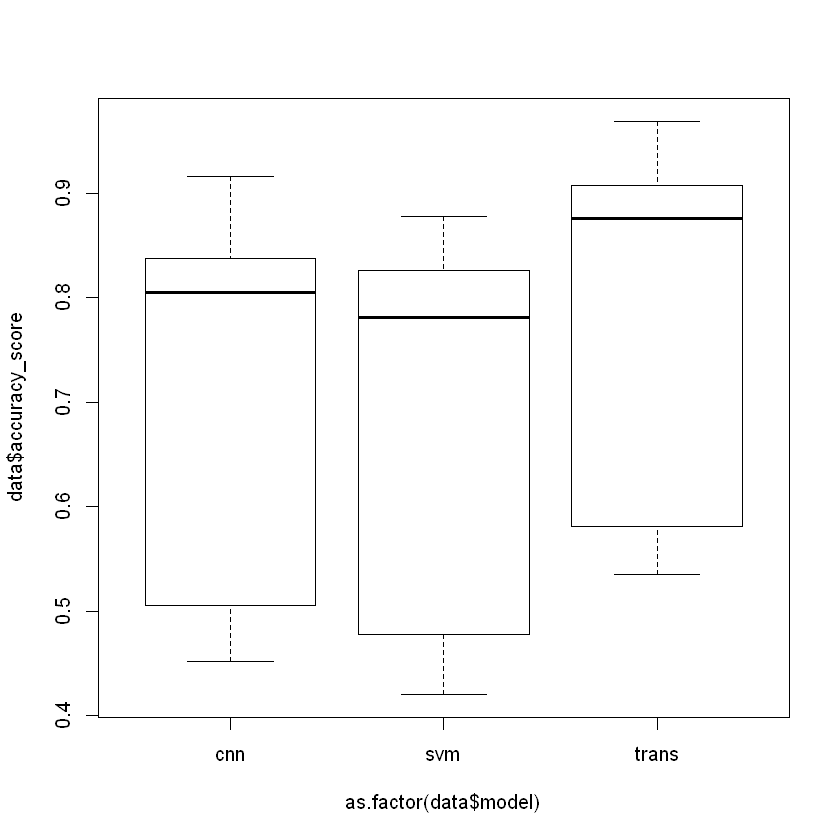

In [170]:
boxplot(data$accuracy_score ~ as.factor(data$model))

In [171]:
av=aov(data$accuracy_score ~ as.factor(data$model))
summary(av)

                       Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(data$model)   2  0.466 0.23297   8.584 0.000238 ***
Residuals             297  8.060 0.02714                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

dựa vào anova t thấy p<0.05 => bác bỏ H0 => có sự khác biệt giữa các model

In [172]:
TukeyHSD(av)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$accuracy_score ~ as.factor(data$model))

$`as.factor(data$model)`
               diff         lwr        upr     p adj
svm-cnn   -0.020551 -0.07542951 0.03432751 0.6520248
trans-cnn  0.071409  0.01653049 0.12628751 0.0066980
trans-svm  0.091960  0.03708149 0.14683851 0.0002904


bằng phân tích hậu định ta có 

model svm cho kết quả trung bình thấp hơn model cnn là 0.02 với p>0.05 => ko có ý nghĩa thống kê

model trans cho kết quả trung bình cao hơn model cnn là 0.07 với p<0.05 => có ý nghĩa thống kê

model trans cho kết quả trung bình cao hơn model svm là 0.09 với p<0.05 => có ý nghĩa thống kê

từ đây có thể thấy model trans cho hiệu suất tốt nhất so với svm và cnn

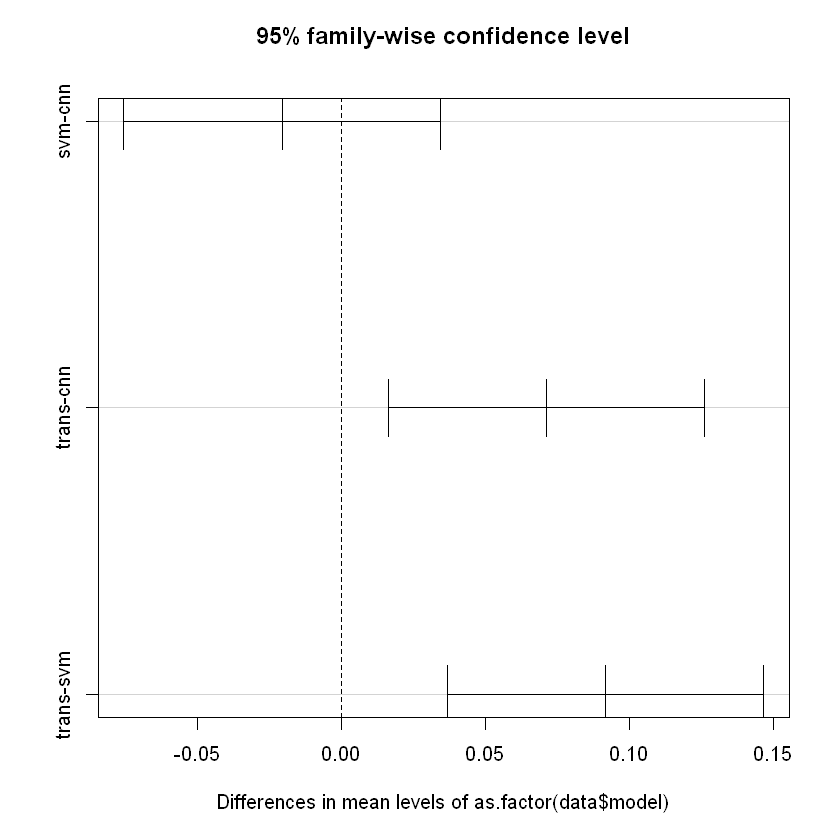

In [173]:
plot(TukeyHSD(av))

H0: ko có khác biệt nào giữa các pp embedding

H1: có sự khác biệt giữa các pp embedding

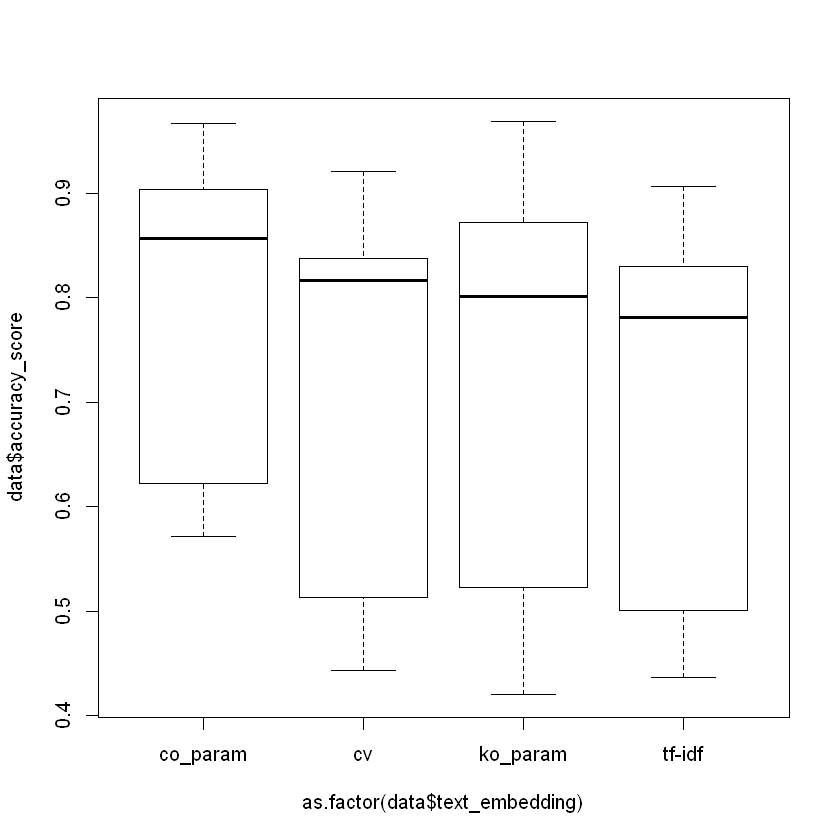

In [174]:
boxplot(data$accuracy_score ~ as.factor(data$text_embedding))

In [175]:
av=aov(data$accuracy_score ~ as.factor(data$text_embedding))
summary(av)

                                Df Sum Sq Mean Sq F value  Pr(>F)   
as.factor(data$text_embedding)   3  0.395 0.13157   4.789 0.00283 **
Residuals                      296  8.132 0.02747                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

dựa vào anova t thấy p<0.05 => bác bỏ H0 => có sự khác biệt giữa các pp embedding

In [176]:
TukeyHSD(av)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = data$accuracy_score ~ as.factor(data$text_embedding))

$`as.factor(data$text_embedding)`
                          diff         lwr          upr     p adj
cv-co_param       -0.076566667 -0.14649712 -0.006636212 0.0255698
ko_param-co_param -0.075300000 -0.14523045 -0.005369545 0.0292012
tf-idf-co_param   -0.094105333 -0.16403579 -0.024174879 0.0032547
ko_param-cv        0.001266667 -0.06866379  0.071197121 0.9999631
tf-idf-cv         -0.017538667 -0.08746912  0.052391788 0.9161974
tf-idf-ko_param   -0.018805333 -0.08873579  0.051125121 0.8990362


dựa vào phân tích hậu định

pp cv cho kết quả trung bình thấp hơn co_param là 0.076, p<0.05 => có ý nghĩa thống kê

pp ko_param cho kết quả trung bình thấp hơn co_param là 0.075, p<0.05 => có ý nghĩa thống kê

pp tf_idf cho kết quả trung bình thấp hơn co_param là 0.094, p <0.05 => có nghĩa thống kê

=> pp co_param có hiệu suất tốt nhất

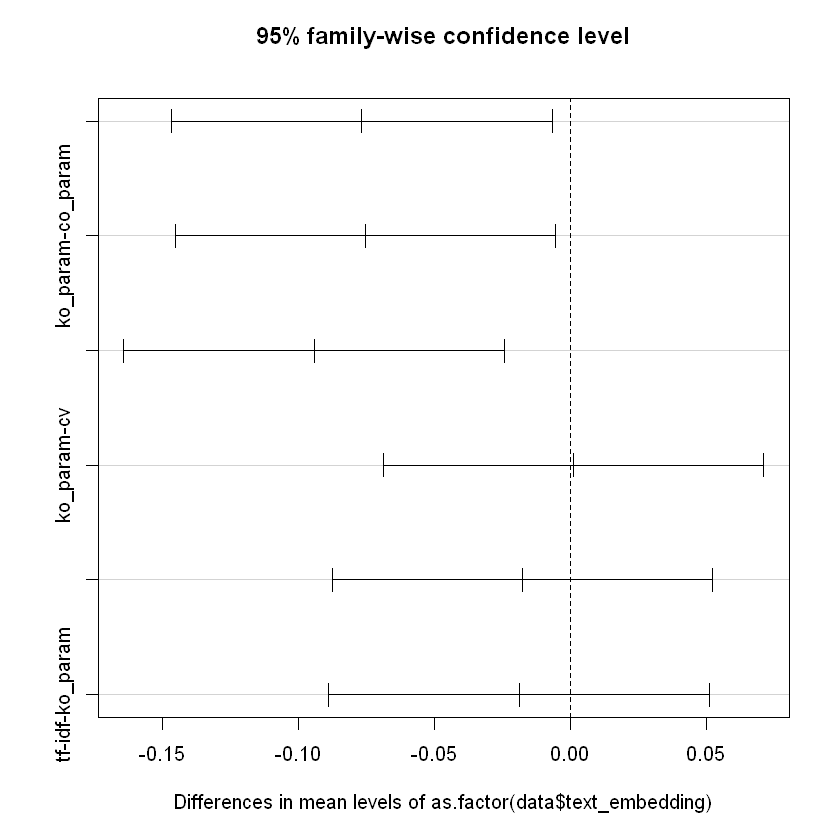

In [177]:
plot(TukeyHSD(av))

H0: không có sự khác biệt giữa preprocessing và ko preprocessing
H1: có sự khác biệt giữa preprocessing và ko preprocessing

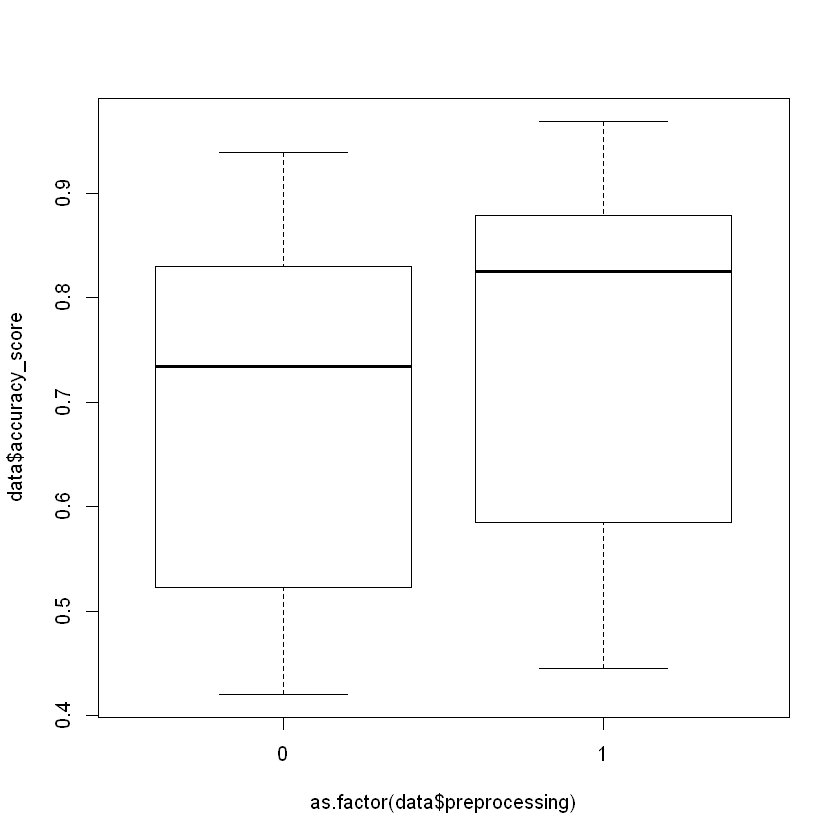

In [178]:
boxplot(data$accuracy_score ~ as.factor(data$preprocessing))

In [179]:
t.test(data$accuracy_score ~ as.factor(data$preprocessing))


	Welch Two Sample t-test

data:  data$accuracy_score by as.factor(data$preprocessing)
t = -3.5532, df = 247.91, p-value = 0.0004554
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.10868646 -0.03116576
sample estimates:
mean in group 0 mean in group 1 
      0.6856300       0.7555561 


dựa vào t test, p<0.05 => có sự khác biệt giữa 2 nhóm

H0: preprocessing cho kết quả ko cao hơn là ko preprocessing

H1: preprocessing cho kết quả cao hơn

In [184]:
head(data)

X,model,data,preprocessing,text_embedding,lan_chay,accuracy_score,f1_score
20,svm,uit-vihsd,1,cv,1,0.8263,0.5337
21,svm,uit-vihsd,1,cv,2,0.8260,0.5592
22,svm,uit-vihsd,1,cv,3,0.8241,0.5452
23,svm,uit-vihsd,1,cv,4,0.8132,0.5500
24,svm,uit-vihsd,1,cv,5,0.8223,0.5323
120,svm,uit-vsmec,1,cv,1,0.5155,0.4827


In [193]:
preprocessing_0=data[which(data[['preprocessing']]==0),]['accuracy_score']
preprocessing_1=data[which(data[['preprocessing']]==1),]['accuracy_score'] 

In [197]:
t.test(preprocessing_1,preprocessing_0,alterative='greater')



	Welch Two Sample t-test

data:  preprocessing_1 and preprocessing_0
t = 3.5532, df = 247.91, p-value = 0.0004554
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03116576 0.10868646
sample estimates:
mean of x mean of y 
0.7555561 0.6856300 


dựa vào kiểm định t cho, p<0.05 => bác bỏ H0 => chấp nhận 

H1: preprocessing cho kết quả cao hơn